In [1]:
import joblib

# 저장된 모델 불러오기
model = joblib.load('pkl/XGBOOST_080.pkl')
feature_cols = joblib.load('pkl/feature_cols.pkl')

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_7108\1754959256.py:25: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_7108\1754959256.py:25: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_7108\1754959256.py:25: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_7108\1754959256.py:25: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_7108\1754959256.py:25: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_7108\1754959256.py:25: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing fro

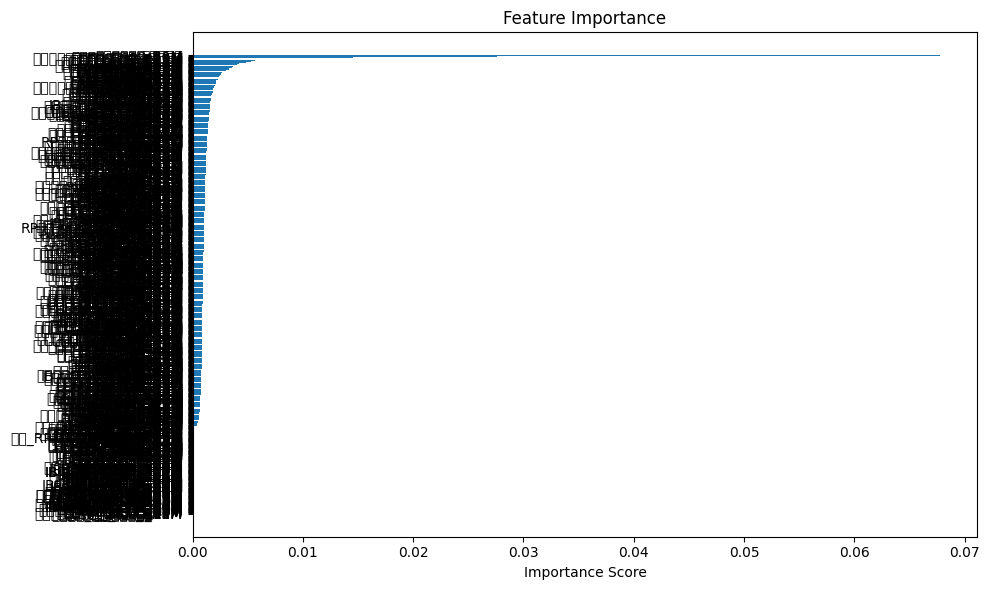

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# feature 이름이 없는 경우를 대비해서 임의로 설정
if hasattr(model, 'feature_names_in_'):
    feature_names = model.feature_names_in_
else:
    feature_names = [f'feature_{i}' for i in range(model.feature_importances_.shape[0])]

# 중요도 추출
importance = model.feature_importances_

# DataFrame으로 정리
df_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(df_importance['Feature'], df_importance['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


In [25]:
# 2. 중요도 추출
importances = model.feature_importances_

# 3. DataFrame으로 정리 및 정렬
df_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 4. 상위 N개만 보고 싶다면 여기서 조절 가능
top_n = 20 # 341
top_features = df_importance.head(top_n)

# 5. 출력
pd.set_option('display.max_rows', None)      # 모든 행 출력
pd.set_option('display.max_columns', None)   # 모든 열 출력
pd.set_option('display.width', None)         # 줄바꿈 없이 출력
pd.set_option('display.max_colwidth', None)  # 열 너비 제한 없음
display(top_features)

,Feature,Importance
484,정상청구원금_B5M,0.067765
508,이용금액대,0.034745
388,이용금액_오프라인_B0M,0.027600
493,연속유실적개월수_기본_24M_카드,0.024845
40,이용금액_R3M_신용체크,0.014545
128,이용금액_체크_B0M,0.011910
156,이용금액_체크_R12M,0.011612
164,최대이용금액_체크_R12M,0.011006
150,이용금액_일시불_R12M,0.005956
140,이용건수_신용_R12M,0.005607


341

In [26]:
zero_importance_features = df_importance[df_importance["Importance"] == 0]["Feature"].tolist()
joblib.dump(zero_importance_features, "pkl/zero_importance_features.pkl")
print(f"{len(zero_importance_features)}개의 중요도 0인 변수를 저장했습니다.")

159개의 중요도 0인 변수를 저장했습니다.
